In [36]:
# show that ROC curve for a given trained classifer is not significantly changed
# when class balance is changed
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer, load_diabetes, load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [37]:
ds = load_digits()
#ds = load_breast_cancer()
#ds = load_diabetes()

In [38]:
#X = pd.DataFrame(ds.data, columns = ds.feature_names).iloc[:,11:14] #first 4 columns only
X = pd.DataFrame(ds.data).iloc[:,11:14] #first 4 columns only
y = pd.Series(ds.target == 3 )
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [39]:
#clf = LogisticRegression(C=0.01).fit(X_train, y_train)
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

proba = pd.Series(clf.predict_proba(X_test)[:,1], index=X_test.index)  #probability of TRUE

In [40]:
fpr, tpr, thresh, roc_auc = ({},{},{},{}) 

In [41]:
key = 'ubal'
fpr[key], tpr[key], thresh[key] = roc_curve(y_test, proba)
roc_auc[key] = auc(fpr[key], tpr[key])
roc_auc[key]
print(roc_auc[key])

0.7885755077851409


In [42]:
yvc = y_test.value_counts()

In [43]:
min_count = yvc.min()

max_count = yvc.max()
max_class = yvc[yvc!=min_count].index[0]

In [51]:
#%%  Bootstrap prep
key = 'bal'
fpr[key], tpr[key], thresh[key], roc_auc[key] = ({},{},{},{})

In [52]:
#%%
bscnt = 10
for i in range(0, bscnt):

    indicies_to_remove = y_test[y_test == max_class].sample(max_count - min_count).index
    #X_test_bal = X_test.drop(indicies_to_remove)
    y_test_bal = y_test.drop(indicies_to_remove)
    proba_bal = proba.drop(indicies_to_remove)

    fpr[key][i], tpr[key][i], thresh[key][i] = roc_curve(y_test_bal, proba_bal)

In [53]:
#%%  Several balanced curves on top of a boostrapped imbalanced curve
for i in range(0, bscnt):
    roc_auc[key][i] = auc(fpr[key][i], tpr[key][i])
    roc_auc[key][i]

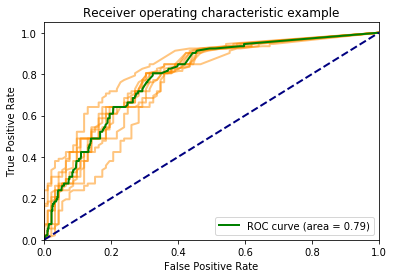

Done plot


In [54]:
#plt.figure()
lw = 2
key = 'bal'

for i in range(0, bscnt):
    plt.plot(fpr[key][i], tpr[key][i], color='darkorange',
             lw=lw, alpha=0.5)

key = 'ubal'
plt.plot(fpr[key], tpr[key], color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[key])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Done plot")
